# Business Analytics - Group Project
# The Effect of Number of Reviews on Airbnb Housing Prices in Boston
# Written by Jagos Perovic and Tuan Anh Tran

### Import the necessary packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import patsy                           # provides a syntax for specifying models  
import statsmodels.api as sm           # provides statistical models like ols, gmm, anova, etc...; 
                                       # for Cross-sectional models and methods.
import statsmodels.formula.api as smf  # provides a way to directly spec models from formulas

### Read in the data

In [2]:
df = pd.read_csv('listings.csv') #load data using pandas

In [3]:
df.head() # shows the first 5 records of dataframe df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,3781,HARBORSIDE-Walk to subway,4804,Frank,NaN,East Boston,42.36413,-71.02991,Entire home/apt,125,32,19,2/26/21,0.27,1,106
1,6695,$99 Special!! Home Away! Condo,8229,Terry,NaN,Roxbury,42.32802,-71.09387,Entire home/apt,169,29,115,11/2/19,0.81,4,40
2,10813,"Back Bay Apt-blocks to subway, Newbury St, The...",38997,Michelle,NaN,Back Bay,42.35061,-71.08787,Entire home/apt,96,29,5,12/2/20,0.08,11,307
3,10986,North End (Waterfront area) CLOSE TO MGH & SU...,38997,Michelle,NaN,North End,42.36377,-71.05206,Entire home/apt,96,29,2,5/23/16,0.03,11,293
4,13247,Back Bay studio apartment,51637,Susan,NaN,Back Bay,42.35164,-71.08752,Entire home/apt,75,91,0,NaN,NaN,2,0


### Exploratory Analysis of the Data

In [4]:
df.shape

(3146, 16)

##### 3146 rows (records) and 16 columns

In [5]:
df.dtypes # datatype of attributes in df

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [6]:
# All values in categorical column neighbourhood
df.neighbourhood.unique()

array(['East Boston', 'Roxbury', 'Back Bay', 'North End', 'Beacon Hill',
       'Dorchester', 'South End', 'Charlestown', 'Jamaica Plain',
       'Downtown', 'South Boston', 'Allston', 'Bay Village', 'Brighton',
       'West Roxbury', 'Roslindale', 'Mission Hill', 'Fenway',
       'Hyde Park', 'West End', 'Mattapan', 'South Boston Waterfront',
       'Chinatown', 'Longwood Medical Area', 'Leather District'],
      dtype=object)

In [7]:
# All values in categorical column room_type
df.room_type.unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [8]:
# Show descriptive statistic in form of a table 
df.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.146000e+03,3.146000e+03,0.0,3146.000000,3146.000000,3146.000000,3146.000000,3146.000000,2164.000000,3146.000000,3146.000000
mean,2.988069e+07,1.180036e+08,NaN,42.337572,-71.080984,164.114113,42.440877,36.025429,1.424653,24.818182,178.293388
std,1.537945e+07,1.240861e+08,NaN,0.026509,0.032690,307.437836,45.084840,71.069285,1.768545,41.719009,139.056764
min,3.781000e+03,4.804000e+03,NaN,42.235330,-71.173510,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.715611e+07,1.628474e+07,NaN,42.322415,-71.097945,75.000000,2.000000,0.000000,0.237500,1.000000,39.250000
50%,3.251965e+07,5.680370e+07,NaN,42.344290,-71.070535,125.000000,29.000000,5.000000,0.830000,5.000000,171.000000
75%,4.509599e+07,2.123598e+08,NaN,42.354335,-71.061143,191.000000,91.000000,37.000000,2.062500,25.000000,325.000000
max,4.930686e+07,3.938483e+08,NaN,42.399730,-70.982640,10000.000000,1000.000000,610.000000,23.090000,152.000000,365.000000


In [9]:
# Show correlation between variables
df.corr()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.560865,NaN,0.101985,0.117563,0.062067,-0.069560,-0.479758,0.075537,0.350979,0.132605
host_id,0.560865,1.000000,NaN,0.003024,0.107570,0.055087,0.057699,-0.250123,0.127374,0.300469,0.190090
neighbourhood_group,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,0.101985,0.003024,NaN,1.000000,0.293856,0.049193,-0.007733,0.032371,0.143736,0.086655,-0.082344
longitude,0.117563,0.107570,NaN,0.293856,1.000000,0.072158,-0.056749,0.034139,0.149899,0.200797,0.049548
price,0.062067,0.055087,NaN,0.049193,0.072158,1.000000,-0.014909,-0.039608,-0.022306,0.001487,0.004238
minimum_nights,-0.069560,0.057699,NaN,-0.007733,-0.056749,-0.014909,1.000000,-0.233895,-0.374082,0.157111,0.080195
number_of_reviews,-0.479758,-0.250123,NaN,0.032371,0.034139,-0.039608,-0.233895,1.000000,0.689219,-0.192643,-0.045193
reviews_per_month,0.075537,0.127374,NaN,0.143736,0.149899,-0.022306,-0.374082,0.689219,1.000000,-0.066061,0.020922
calculated_host_listings_count,0.350979,0.300469,NaN,0.086655,0.200797,0.001487,0.157111,-0.192643,-0.066061,1.000000,0.225251


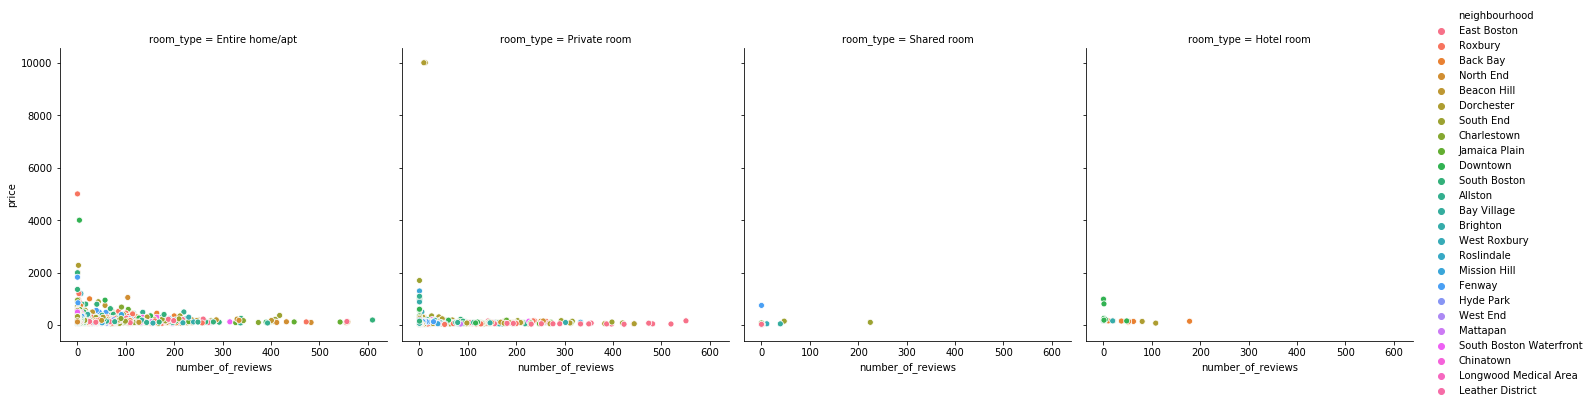

In [44]:
# The relationship between price and number_of_reviews by room_type and neighbourhood
sns.relplot(data=df, x="number_of_reviews", y="price", col="room_type", hue="neighbourhood")

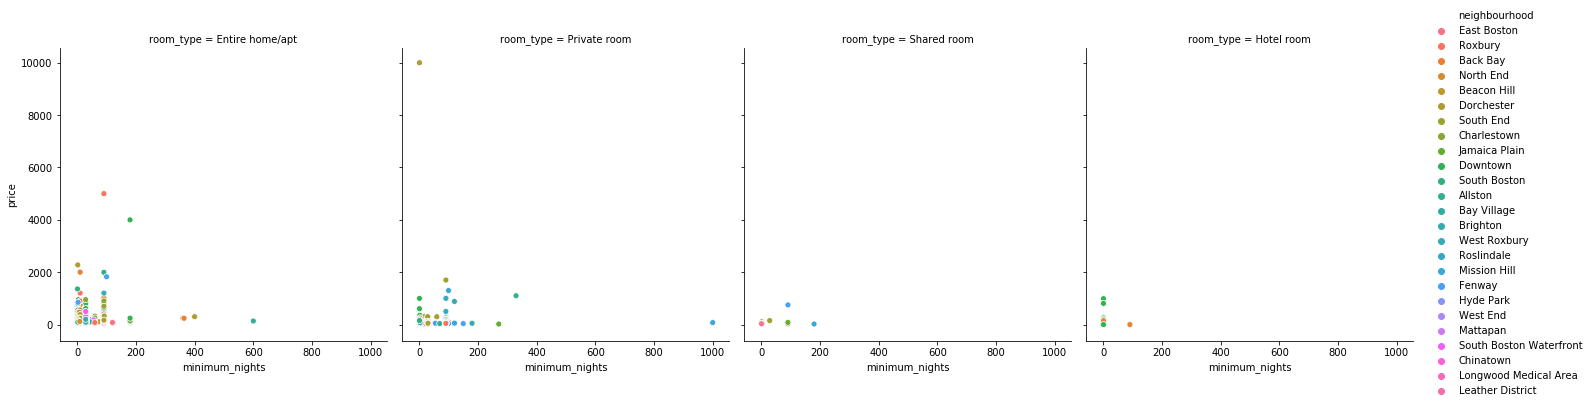

In [11]:
# The relationship between price and minimum_nights by room_type and neighbourhood
sns.relplot(data=df, x="minimum_nights", y="price", col="room_type", hue="neighbourhood")

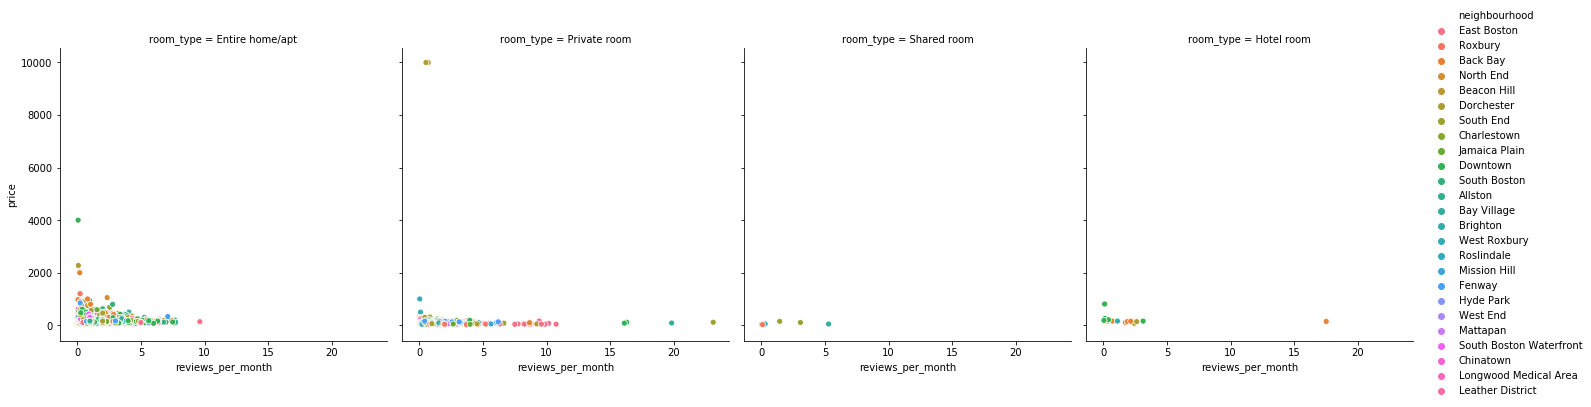

In [12]:
# The relationship between price and reviews_per_month by room_type and neighbourhood
sns.relplot(data=df, x="reviews_per_month", y="price", col="room_type", hue="neighbourhood")

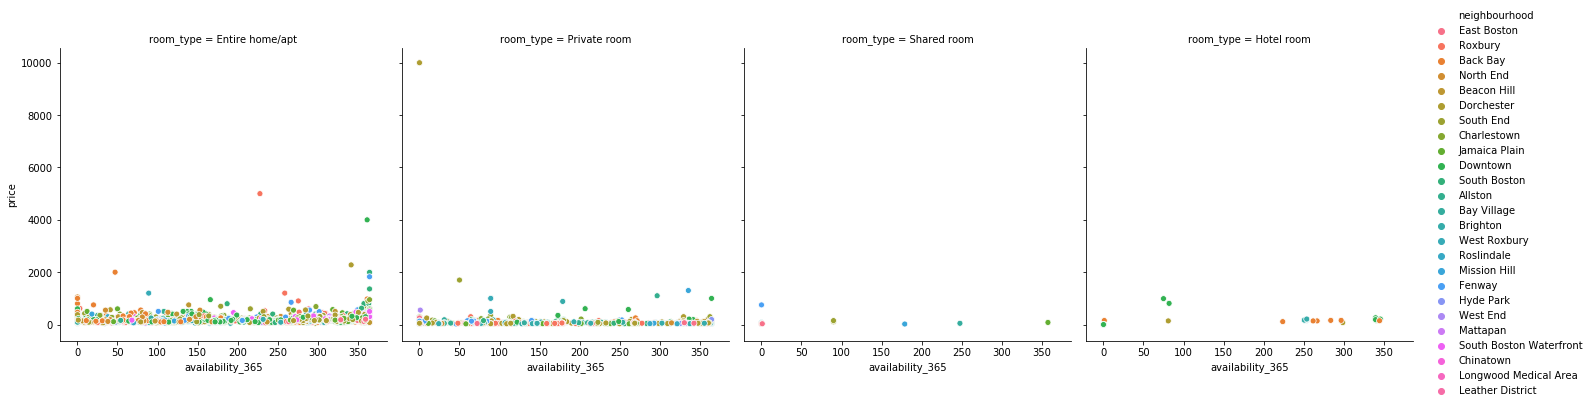

In [13]:
# The relationship between price and availability_365 by room_type and neighbourhood
sns.relplot(data=df, x="availability_365", y="price", col="room_type", hue="neighbourhood")

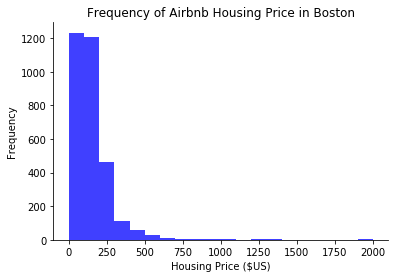

In [14]:
fig, ax = plt.subplots() 

ax.hist(df.price, bins=20, range=(0,2000), color='blue', alpha=0.75)   

ax.set_ylabel('Frequency')
ax.set_xlabel('Housing Price ($US)')
ax.set_title('Frequency of Airbnb Housing Price in Boston')          

ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False)

plt.show()

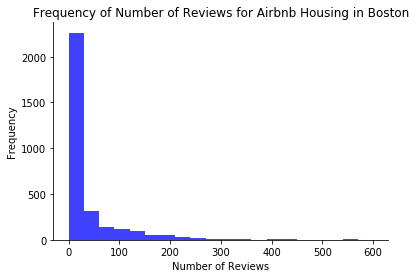

In [15]:
fig, ax = plt.subplots() 

ax.hist(df.number_of_reviews, bins=20, range=(0,600), color='blue', alpha=0.75)   

ax.set_ylabel('Frequency')
ax.set_xlabel('Number of Reviews')
ax.set_title('Frequency of Number of Reviews for Airbnb Housing in Boston')          

ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False)              

plt.show()

### Create new dataframe including only numeric attributes

In [16]:
# selecting only numeric columns and storing in df_numeric as we want to find missing values in numeric columns.
df_numeric = df.select_dtypes(include='number')
df_numeric

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,3781,4804,NaN,42.364130,-71.029910,125,32,19,0.27,1,106
1,6695,8229,NaN,42.328020,-71.093870,169,29,115,0.81,4,40
2,10813,38997,NaN,42.350610,-71.087870,96,29,5,0.08,11,307
3,10986,38997,NaN,42.363770,-71.052060,96,29,2,0.03,11,293
4,13247,51637,NaN,42.351640,-71.087520,75,91,0,NaN,2,0
...,...,...,...,...,...,...,...,...,...,...,...
3141,49271154,87160718,NaN,42.330990,-71.041380,150,1,0,NaN,1,80
3142,49283610,368944610,NaN,42.344260,-71.066150,325,92,0,NaN,50,288
3143,49291430,359229620,NaN,42.282460,-71.037060,152,92,0,NaN,152,296
3144,49294229,359229620,NaN,42.323860,-71.061360,170,91,0,NaN,152,1


In [17]:
# retrieve the names of the columns from df_numeric
numeric_cols = df_numeric.columns.values 
print(numeric_cols)

['id' 'host_id' 'neighbourhood_group' 'latitude' 'longitude' 'price'
 'minimum_nights' 'number_of_reviews' 'reviews_per_month'
 'calculated_host_listings_count' 'availability_365']


### Handle missing values

First, we need to find whether out data set has missing values. Here, we use technique called creating missing data heatmap

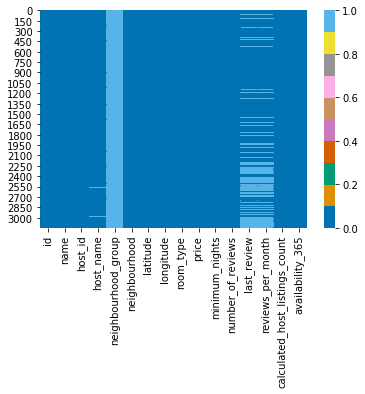

In [18]:
sns.heatmap(df.isnull(), cmap=sns.color_palette(palette='colorblind')) 
plt.show()

The lighter-color boxes show the missing values.

From the heatmap, we need to handle the missing values in host_name, neighbourhood_group, last_review, and reviews_per_month columns.

#### Because host_name attribute is categorical, so we will add a new category with a value called ‘_MISSING_’.

In [19]:
df['host_name'] = df['host_name'].fillna('_MISSING_')

#### As neighbourhood_group column does not provide any useful information (the whole values in this coulum are missing) then we will drop it.

In [20]:
df = df.drop('neighbourhood_group',axis=1)

#### As last_review attribute is also categorical, so likewise, we will add ‘_MISSING_’. value to this column.

In [21]:
df['last_review'] = df['last_review'].fillna('_MISSING_')

#### The reviews_per_month column is continuous numeric, so first, we need to see whether this column is skewed!

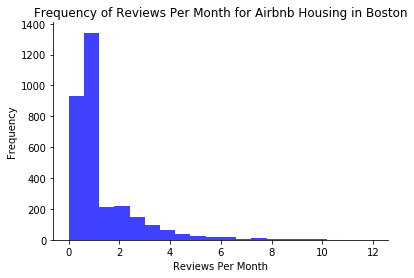

In [63]:
fig, ax = plt.subplots() 

ax.hist(df.reviews_per_month, bins = 20, range = (0,12),color='blue', alpha=0.75)   

ax.set_ylabel('Frequency')
ax.set_xlabel('Reviews Per Month')
ax.set_title('Frequency of Reviews Per Month for Airbnb Housing in Boston')          

ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False)

plt.show()

From this histogram, we find that reviews_per_month's distribution is right-skewed, therefore, we will replace the missing values with the median values from the data of the same feature that is not missing.

In [23]:
reviews_per_month_median = df['reviews_per_month'].median() # Calculate the median of reviews_per_month
reviews_per_month_median

0.83

In [24]:
#Replace the missing values with median
df['reviews_per_month'] = df['reviews_per_month'].fillna(reviews_per_month_median)

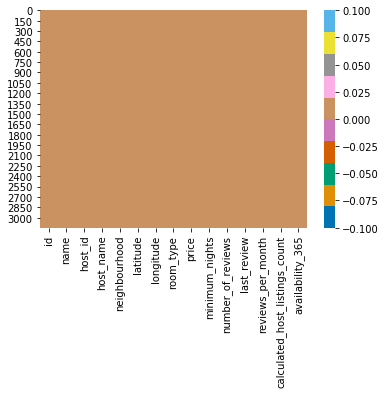

In [25]:
# Check to see if we have successfully handled the missing values or not
sns.heatmap(df.isnull(), cmap=sns.color_palette(palette='colorblind')) 
plt.show()

There is no lighter-color box left, so we have successfully handled the missing values

In [26]:
df.isnull() # Recheck if there is any missing value (null) in our dataset

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3141,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3142,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3143,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3144,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


### Preprocess the data

Because the housing price cannot be 0, so we will drop the rows with price = 0 in order for our future regression models to work efficiently.

In [27]:
df.drop(df.index[df["price"]==0], axis=0, inplace=True)

### Some Data Exploration After Cleaning  and Preprocessing the Data

In [28]:
df.shape

(3142, 15)

After cleaning and preprocessing our dataset, we are left with 3142 rows and 15 columns.

In [29]:
# Show descriptive statistic in form of a table 
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.142000e+03,3.142000e+03,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000
mean,2.986396e+07,1.178295e+08,42.337556,-71.080991,164.323043,42.464990,36.071292,1.239558,24.848504,178.520369
std,1.538194e+07,1.240182e+08,0.026520,0.032708,307.577709,45.087024,71.102887,1.493220,41.736899,138.999550
min,3.781000e+03,4.804000e+03,42.235330,-71.173510,19.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.711532e+07,1.621113e+07,42.322395,-71.097983,75.000000,2.000000,0.000000,0.430000,1.000000,41.000000
50%,3.238408e+07,5.635941e+07,42.344260,-71.070510,125.000000,29.000000,5.000000,0.830000,5.000000,171.000000
75%,4.509599e+07,2.123598e+08,42.354335,-71.061130,191.750000,91.000000,37.000000,1.440000,25.000000,325.000000
max,4.930686e+07,3.938483e+08,42.399730,-70.982640,10000.000000,1000.000000,610.000000,23.090000,152.000000,365.000000


In [30]:
# Show correlation between variables
df.corr()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.560509,0.101479,0.117421,0.062689,-0.069137,-0.479513,-0.034677,0.351840,0.134205
host_id,0.560509,1.000000,0.002115,0.107364,0.055913,0.059148,-0.249748,0.032012,0.301690,0.192318
latitude,0.101479,0.002115,1.000000,0.293752,0.049543,-0.007350,0.032697,0.106172,0.087045,-0.081654
longitude,0.117421,0.107364,0.293752,1.000000,0.072285,-0.056604,0.034249,0.108948,0.200969,0.049864
price,0.062689,0.055913,0.049543,0.072285,1.000000,-0.015206,-0.039966,-0.025833,0.001099,0.003370
minimum_nights,-0.069137,0.059148,-0.007350,-0.056604,-0.015206,1.000000,-0.234342,-0.300688,0.156931,0.079640
number_of_reviews,-0.479513,-0.249748,0.032697,0.034249,-0.039966,-0.234342,1.000000,0.699677,-0.193083,-0.046077
reviews_per_month,-0.034677,0.032012,0.106172,0.108948,-0.025833,-0.300688,0.699677,1.000000,-0.111706,-0.020133
calculated_host_listings_count,0.351840,0.301690,0.087045,0.200969,0.001099,0.156931,-0.193083,-0.111706,1.000000,0.224600
availability_365,0.134205,0.192318,-0.081654,0.049864,0.003370,0.079640,-0.046077,-0.020133,0.224600,1.000000


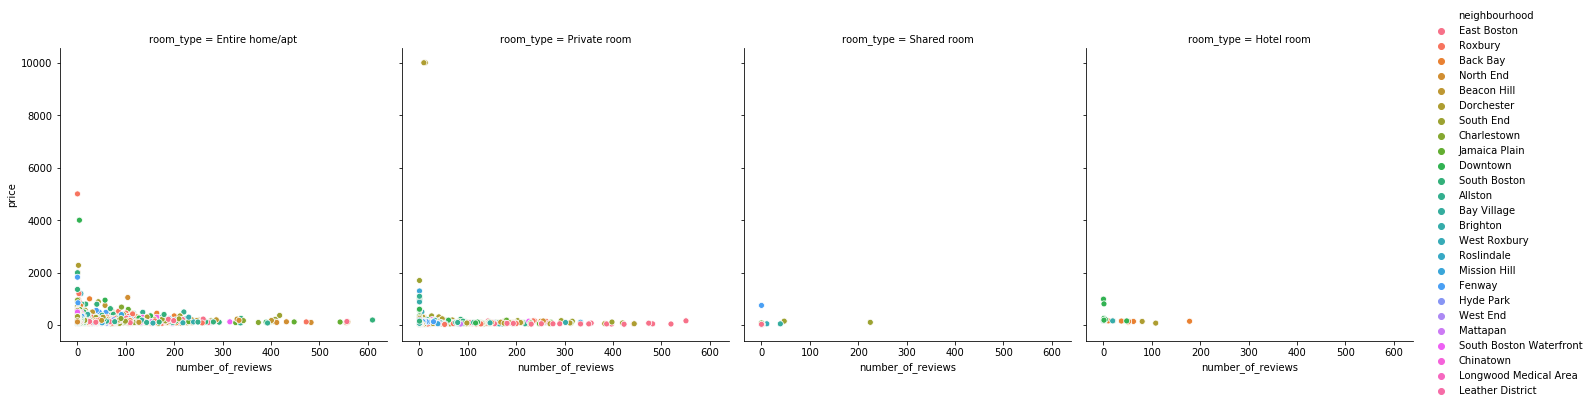

In [31]:
# The relationship between price and number_of_reviews by room_type and neighbourhood
sns.relplot(data=df, x="number_of_reviews", y="price", col="room_type", hue="neighbourhood")

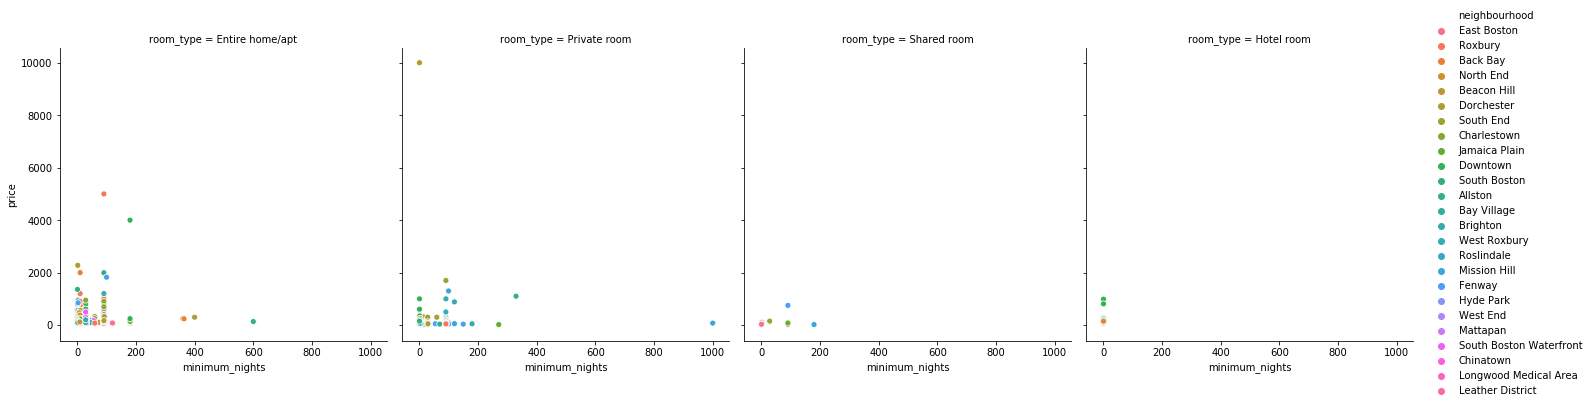

In [32]:
# The relationship between price and minimum_nights by room_type and neighbourhood
sns.relplot(data=df, x="minimum_nights", y="price", col="room_type", hue="neighbourhood")

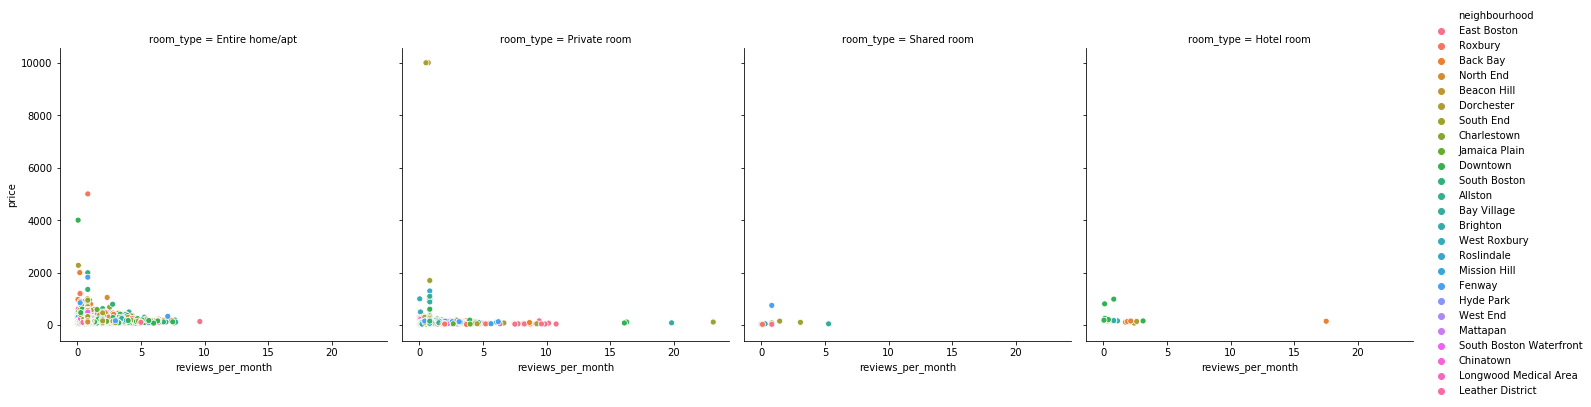

In [33]:
# The relationship between price and reviews_per_month by room_type and neighbourhood
sns.relplot(data=df, x="reviews_per_month", y="price", col="room_type", hue="neighbourhood")

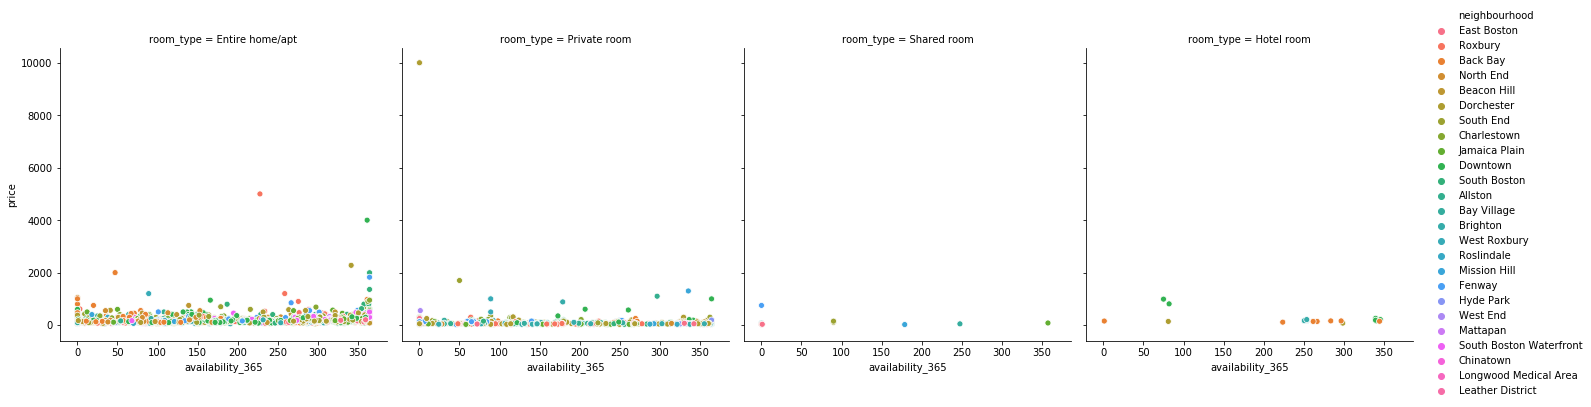

In [34]:
# The relationship between price and availability_365 by room_type and neighbourhood
sns.relplot(data=df, x="availability_365", y="price", col="room_type", hue="neighbourhood")

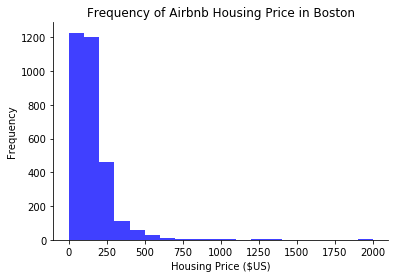

In [35]:
# Distribution of price (our outcome variable)
fig, ax = plt.subplots() 

ax.hist(df.price, bins=20, range=(0,2000), color='blue', alpha=0.75)   

ax.set_ylabel('Frequency')
ax.set_xlabel('Housing Price ($US)')
ax.set_title('Frequency of Airbnb Housing Price in Boston')          

ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False)              

plt.show()

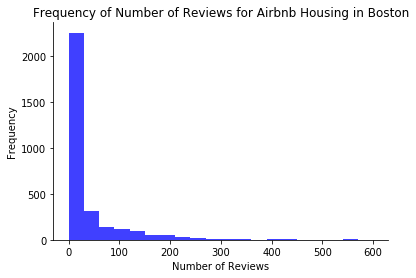

In [36]:
# Distribution of number_of_reviews (main explanatory variable)
fig, ax = plt.subplots() 

ax.hist(df.number_of_reviews, bins=20, range=(0,600), color='blue', alpha=0.75)   

ax.set_ylabel('Frequency')
ax.set_xlabel('Number of Reviews')
ax.set_title('Frequency of Number of Reviews for Airbnb Housing in Boston')          

ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False)              

plt.show()

### Detect irregular data

We are interested in detecting the outliers in the columns: price (our dependent variable); number_of_reviews (our main explanatory variable); neighbourhood, room_type, minimum_nights, reviews_per_month, and availability_365 (our other control variables)

#### First, we plot boxplot to detect the outliers in the numeric columns (price, number_of_reviews, minimum_nights, reviews_per_month, and availability_365).

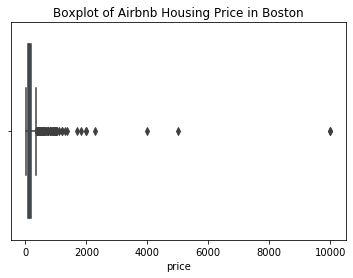

In [45]:
# Detect the outliers in column price
plt.title("Boxplot of Airbnb Housing Price in Boston")
sns.boxplot(data=df,x='price')
plt.show()

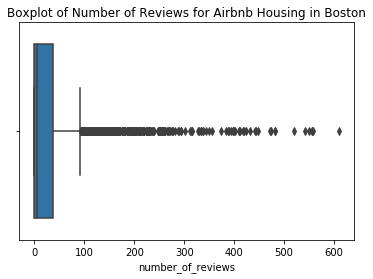

In [46]:
# Detect the outliers in column number_of_reviews
plt.title('Boxplot of Number of Reviews for Airbnb Housing in Boston')
sns.boxplot(data=df,x='number_of_reviews')
plt.show()

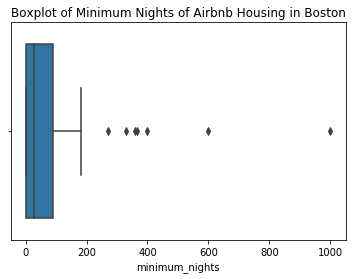

In [47]:
# Detect the outliers in column minimum_nights
plt.title('Boxplot of Minimum Nights of Airbnb Housing in Boston')
sns.boxplot(data=df,x='minimum_nights')
plt.show()

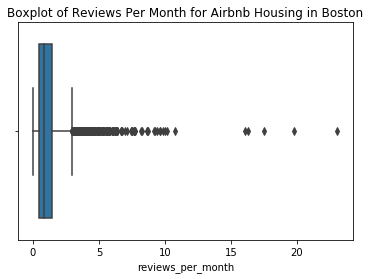

In [48]:
# Detect the outliers in column reviews_per_month
plt.title('Boxplot of Reviews Per Month for Airbnb Housing in Boston')
sns.boxplot(data=df,x='reviews_per_month')
plt.show()

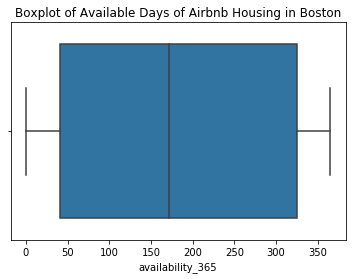

In [49]:
# Detect the outliers in column availability_365
plt.title('Boxplot of Available Days of Airbnb Housing in Boston')
sns.boxplot(data=df,x='availability_365')
plt.show()

We have a lot of outliers in price, number_of_reviews, minimum_nights, and reviews_per_month, and no outlier in availability_365. Since the data in price, number_of_reviews, minimum_nights, and reviews_per_month are all informative, so we decide to keep them. Nonetheless, this will create a limitation for our models.

#### Next, we use bar charts to learn about categorical columns (neighbourhood and room_type) and their distribution.

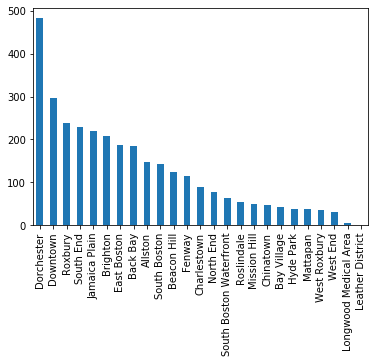

In [50]:
# Bar chart -  distribution of neighbourhood
df['neighbourhood'].value_counts().plot.bar() #value_counts counts frequency

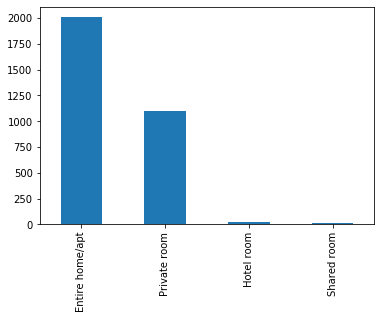

In [51]:
# Bar chart -  distribution of room_type
df['room_type'].value_counts().plot.bar() #value_counts counts frequency

Likewise, we also have many outliers in these two columns, but we decide to keep the data since they are informative. Again, this will be one of the limitations in our models.

### Test Linear Regression Models

#### Model I: price = β0 + β1*(number_of_reviews) + u

In [52]:
# Testing model I
res1 = smf.ols('price ~ number_of_reviews', data=df).fit()
print(res1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     5.024
Date:                Fri, 21 May 2021   Prob (F-statistic):             0.0251
Time:                        16:38:53   Log-Likelihood:                -22455.
No. Observations:                3142   AIC:                         4.491e+04
Df Residuals:                    3140   BIC:                         4.493e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           170.5593      6.14

#### Model I Coefficients Interpretation:

The coefficient on number_of_reviews implies that ceteris paribus, if there is one more review, then the Airbnb rental price in Boston reduces by $0.1729.

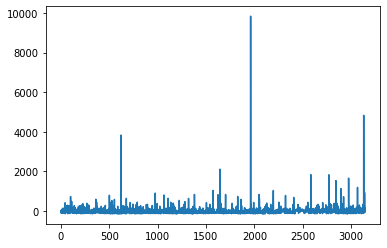

In [53]:
res1.resid.plot()

#### Model II: price = α0 + α1*(number_of_reviews) + α2*(neighbourhood) + α3*(room_type) + α4*(minimum_nights) + α5*(reviews_per_month) + α6*(availability_365) + v

In [54]:
# Use LabelEncoder to conver all the non-numeric values into numeric ones to build regression models.  

# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
LE = LabelEncoder()

# Iterate over all the values of each column and extract their dtypes
for col in df.columns:
    # Compare if the dtype is object
    if df[col].dtype=='object':
    # Use LabelEncoder to do the numeric transformation
        df[col] = LE.fit_transform(list(df[col]))

In [55]:
# dataset after converting
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,3781,1324,4804,270,9,42.36413,-71.02991,0,125,32,19,292,0.27,1,106
1,6695,36,8229,743,19,42.32802,-71.09387,0,169,29,115,155,0.81,4,40
2,10813,405,38997,557,1,42.35061,-71.08787,0,96,29,5,219,0.08,11,307
3,10986,1893,38997,557,17,42.36377,-71.05206,0,96,29,2,466,0.03,11,293
4,13247,416,51637,734,1,42.35164,-71.08752,0,75,91,0,760,0.83,2,0


In [57]:
# Testing model II
res2 = smf.ols('price ~ number_of_reviews + neighbourhood + room_type + minimum_nights + reviews_per_month + availability_365', data=df).fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     13.52
Date:                Fri, 21 May 2021   Prob (F-statistic):           3.36e-15
Time:                        16:39:08   Log-Likelihood:                -22417.
No. Observations:                3142   AIC:                         4.485e+04
Df Residuals:                    3135   BIC:                         4.489e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           207.3021     15.05

#### Model II Coefficients Interpretation:

The coefficient on number_of_reviews implies that ceteris paribus, if there is one more review, then the Airbnb housing price in Boston reduces by $0.1453.

The coefficient on neighbourhood indicates that at a given value for neighbourhood, then $0.5937 is the expected difference in Airbnb rental price in Boston among the Boston's neighbourhoods.

The coefficient on room_type means that at a given value for room_type, then -$48.4555 is the expected difference in Airbnb housing price in Boston among entire home/apartment, private room, shared room, and hotel room.

The coefficient on minimum_nights implies that ceteris paribus, if the host increases the minimum nights by one night, then his/her Airbnb rental price in Boston decreases by $0.1365.

The coefficient on reviews_per_month indicates that ceteris paribus, if there is one more review per month, then the Airbnb housing price in Boston reduces by $3.4921.

The coefficient on availability_365 means that ceteris paribus, if an Airbnb housing in Boston has one more available day, then its rental price rises by $0.0054.

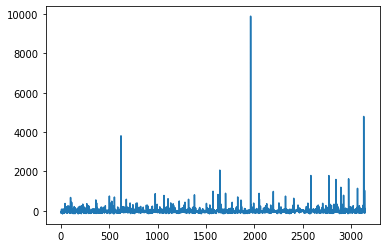

In [58]:
res2.resid.plot()

#### Conclusion:
The R-squared in Model II has been improved when compared to the R-squared in Model I. Therefore, by including more control variables, we have more percentage of variation in price that is explained by variation in independent variables.

However, Model II is not perfect because almost all of the coefficients are not statistically significant, in particular, coefficients on number_of_reviews, neighbourhood, minimum_nights, reviews_per_month, and availability_365. 
Our data also has limitations such as many missing values and outliers.